<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Part-A---MLP-Coursework-2" data-toc-modified-id="Part-A---MLP-Coursework-2-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Part A - MLP Coursework 2</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Setup</a></span></li></ul></li><li><span><a href="#A1-::-Baseline-Experimens-using-DNN-on-EMNIST" data-toc-modified-id="A1-::-Baseline-Experimens-using-DNN-on-EMNIST-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>A1 :: Baseline Experimens using DNN on EMNIST</a></span><ul class="toc-item"><li><span><a href="#Experiment-1,2-:-Changing-number-of-hidden-layers-(2-10)-,-Activation-Function" data-toc-modified-id="Experiment-1,2-:-Changing-number-of-hidden-layers-(2-10)-,-Activation-Function-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Experiment 1,2 : Changing number of hidden layers (2-10) , Activation Function</a></span><ul class="toc-item"><li><span><a href="#Sigmoid-Activation-Function" data-toc-modified-id="Sigmoid-Activation-Function-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Sigmoid Activation Function</a></span></li><li><span><a href="#RELU-Activation-Function" data-toc-modified-id="RELU-Activation-Function-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>RELU Activation Function</a></span></li><li><span><a href="#ELU-Activation-Function" data-toc-modified-id="ELU-Activation-Function-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>ELU Activation Function</a></span></li><li><span><a href="#SELU-Activation-Function" data-toc-modified-id="SELU-Activation-Function-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>SELU Activation Function</a></span></li></ul></li><li><span><a href="#Experiment-3:-Changing-number-of-hidden-units" data-toc-modified-id="Experiment-3:-Changing-number-of-hidden-units-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Experiment 3: Changing number of hidden units</a></span><ul class="toc-item"><li><span><a href="#100-200-300-400" data-toc-modified-id="100-200-300-400-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>100-200-300-400</a></span></li><li><span><a href="#500-600-700" data-toc-modified-id="500-600-700-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>500-600-700</a></span></li></ul></li><li><span><a href="#Experiment-4:-Regularisers" data-toc-modified-id="Experiment-4:-Regularisers-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Experiment 4: Regularisers</a></span><ul class="toc-item"><li><span><a href="#DropOut-Layer" data-toc-modified-id="DropOut-Layer-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>DropOut Layer</a></span></li></ul></li></ul></li><li><span><a href="#Learning-Rule-(A2-A3)" data-toc-modified-id="Learning-Rule-(A2-A3)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Learning Rule (A2-A3)</a></span><ul class="toc-item"><li><span><a href="#Stochastic-Gradient-Descent-(SGD)" data-toc-modified-id="Stochastic-Gradient-Descent-(SGD)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Stochastic Gradient Descent (SGD)</a></span></li><li><span><a href="#RMSProp" data-toc-modified-id="RMSProp-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>RMSProp</a></span></li><li><span><a href="#Adam-Learning-Rule" data-toc-modified-id="Adam-Learning-Rule-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Adam Learning Rule</a></span></li></ul></li><li><span><a href="#BatchNorm-Layer-(A4-A7)" data-toc-modified-id="BatchNorm-Layer-(A4-A7)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>BatchNorm Layer (A4-A7)</a></span><ul class="toc-item"><li><span><a href="#Sigmoid-+-BatchNorm" data-toc-modified-id="Sigmoid-+-BatchNorm-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Sigmoid + BatchNorm</a></span></li><li><span><a href="#ELU-+-BatchNorm" data-toc-modified-id="ELU-+-BatchNorm-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>ELU + BatchNorm</a></span></li></ul></li><li><span><a href="#SAVING-FILES" data-toc-modified-id="SAVING-FILES-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>SAVING FILES</a></span></li></ul></div>

# Part A - MLP Coursework 2 

## Setup

In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import print_function

In [2]:
from mlp.helper import *
from mlp.artist import *

In [3]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 10102016
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

['inputs', 'targets']
['inputs', 'targets']
['inputs', 'targets']


In [4]:
print("\t\t\tnum_batches * batch_size = size of inputs")
print("train_data\t\t", train_data.num_batches, " * ", train_data.batch_size, " = ", len(train_data.inputs))
print("valid_data\t\t", valid_data.num_batches, " * ", valid_data.batch_size, " = ", len(valid_data.inputs))
print("test_data\t\t", test_data.num_batches, " * ", test_data.batch_size, " = ", len(test_data.inputs))

			num_batches * batch_size = size of inputs
train_data		 1000  *  100  =  100000
valid_data		 158  *  100  =  15800
test_data		 158  *  100  =  15800


In [11]:
###### The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import *
from mlp.errors import CrossEntropyLogSoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import GradientDescentLearningRule, MomentumLearningRule, AdamLearningRule, RMSPropLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.01
num_epochs = 1000 # TODO: CHANGED HERE FOR TESTING ONLY!
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

In [12]:
# reinitialisation of func needed for every expt!
train_data.reset()
test_data.reset()
valid_data.reset()

# Initialise the weights and biases:
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

m = [
    AffineLayer(
        input_dim=input_dim,
        output_dim=hidden_dim,
        weights_initialiser=weights_init,
        biases_initialiser=biases_init),
    ReluLayer(),
    AffineLayer(
        input_dim=hidden_dim,
        output_dim=hidden_dim,
        weights_initialiser=weights_init,
        biases_initialiser=biases_init),
    ReluLayer(),
    AffineLayer(
        input_dim=hidden_dim,
        output_dim=hidden_dim,
        weights_initialiser=weights_init,
        biases_initialiser=biases_init),
    ReluLayer(),
    AffineLayer(
        input_dim=hidden_dim,
        output_dim=output_dim,
        weights_initialiser=weights_init,
        biases_initialiser=biases_init)
]

# create the MLP:
model = MultipleLayerModel(m)
print(model)

error = CrossEntropyLogSoftmaxError()
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

output2 = train_model_and_plot_stats(
    model,
    error,
    learning_rule,
    train_data,
    valid_data,
    test_data,
    num_epochs,
    stats_interval,
    notebook=False,
    displayGraphs=False,
    earlyStop=True,
    steps=3,
    patience=5)

MultiLayerModel(
    AffineLayer(input_dim=784, output_dim=100)
    ReluLayer
    AffineLayer(input_dim=100, output_dim=100)
    ReluLayer
    AffineLayer(input_dim=100, output_dim=100)
    ReluLayer
    AffineLayer(input_dim=100, output_dim=47)
)


Epoch 1: 2.5s to complete
    error(train)=2.35e+00, acc(train)=4.03e-01, error(valid)=2.36e+00, acc(valid)=3.97e-01, error(test)=2.37e+00, acc(test)=3.99e-01
Epoch 2: 2.5s to complete
    error(train)=1.52e+00, acc(train)=5.80e-01, error(valid)=1.53e+00, acc(valid)=5.73e-01, error(test)=1.54e+00, acc(test)=5.71e-01
Epoch 3: 2.5s to complete
    error(train)=1.33e+00, acc(train)=6.27e-01, error(valid)=1.33e+00, acc(valid)=6.19e-01, error(test)=1.35e+00, acc(test)=6.16e-01
Epoch 4: 2.5s to complete
    error(train)=1.21e+00, acc(train)=6.53e-01, error(valid)=1.22e+00, acc(valid)=6.46e-01, error(test)=1.24e+00, acc(test)=6.42e-01
Epoch 5: 2.5s to complete
    error(train)=1.11e+00, acc(train)=6.83e-01, error(valid)=1.11e+00, acc(valid)=6.77e-01, error(test)=1.14e+00, acc(test)=6.70e-01
Epoch 6: 2.5s to complete
    error(train)=1.04e+00, acc(train)=6.96e-01, error(valid)=1.05e+00, acc(valid)=6.92e-01, error(test)=1.08e+00, acc(test)=6.82e-01
Epoch 7: 2.5s to complete
    error(train)=9.7

Epoch 53: 2.5s to complete
    error(train)=4.21e-01, acc(train)=8.58e-01, error(valid)=5.17e-01, acc(valid)=8.31e-01, error(test)=5.51e-01, acc(test)=8.20e-01
Epoch 54: 2.5s to complete
    error(train)=4.18e-01, acc(train)=8.60e-01, error(valid)=5.16e-01, acc(valid)=8.32e-01, error(test)=5.47e-01, acc(test)=8.24e-01
Epoch 55: 2.5s to complete
    error(train)=4.16e-01, acc(train)=8.59e-01, error(valid)=5.16e-01, acc(valid)=8.31e-01, error(test)=5.49e-01, acc(test)=8.23e-01
Epoch 56: 2.5s to complete
    error(train)=4.14e-01, acc(train)=8.61e-01, error(valid)=5.18e-01, acc(valid)=8.31e-01, error(test)=5.48e-01, acc(test)=8.21e-01
UP1: error(valid) at 56 = 5.18e-01 > at 51 = 5.17e-01
Epoch 57: 2.5s to complete
    error(train)=4.10e-01, acc(train)=8.62e-01, error(valid)=5.13e-01, acc(valid)=8.32e-01, error(test)=5.47e-01, acc(test)=8.25e-01
Epoch 58: 2.5s to complete
    error(train)=4.08e-01, acc(train)=8.63e-01, error(valid)=5.14e-01, acc(valid)=8.34e-01, error(test)=5.44e-01, acc(t

Epoch 98: 2.5s to complete
    error(train)=3.27e-01, acc(train)=8.87e-01, error(valid)=5.03e-01, acc(valid)=8.36e-01, error(test)=5.36e-01, acc(test)=8.28e-01
UP1: error(valid) at 98 = 5.03e-01 > at 93 = 5.01e-01
Epoch 99: 2.5s to complete
    error(train)=3.27e-01, acc(train)=8.85e-01, error(valid)=5.02e-01, acc(valid)=8.34e-01, error(test)=5.40e-01, acc(test)=8.23e-01
UP1: error(valid) at 99 = 5.02e-01 > at 94 = 5.01e-01
UP2: error(valid) at 94 = 5.01e-01 > at 89 = 4.97e-01
Epoch 100: 2.5s to complete
    error(train)=3.33e-01, acc(train)=8.84e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01, error(test)=5.43e-01, acc(test)=8.26e-01
UP1: error(valid) at 100 = 5.08e-01 > at 95 = 5.02e-01
UP2: error(valid) at 95 = 5.02e-01 > at 90 = 4.98e-01
UP3: error(valid) at 90 = 4.98e-01 > at 85 = 4.97e-01
EARLY STOPPING


In [13]:
output2

(array([[ 3.86333299,  0.02399   ,  3.86557679,  0.02474684,  3.86434898,
          0.02310127],
        [ 2.34931885,  0.40344   ,  2.35609207,  0.39746835,  2.36950529,
          0.39873418],
        [ 1.52427618,  0.57978   ,  1.52981036,  0.57348101,  1.54451497,
          0.57139241],
        [ 1.325025  ,  0.627     ,  1.32754755,  0.6185443 ,  1.35033756,
          0.61626582],
        [ 1.21186896,  0.65265   ,  1.21750184,  0.64613924,  1.24063176,
          0.64177215],
        [ 1.10916802,  0.68299   ,  1.11405899,  0.67734177,  1.14137135,
          0.67018987],
        [ 1.04378699,  0.69639   ,  1.05133782,  0.69170886,  1.07825291,
          0.68189873],
        [ 0.97030576,  0.71786   ,  0.97923003,  0.71379747,  1.00488446,
          0.70316456],
        [ 0.91286956,  0.73318   ,  0.92264847,  0.72765823,  0.95429446,
          0.71803797],
        [ 0.87110844,  0.73987   ,  0.88249506,  0.73487342,  0.91109104,
          0.72392405],
        [ 0.82720755,  0.75407

In [14]:
run_stats, keys, train_time, best_epoch, best_model, param_stats = output2

In [16]:
len(param_stats)

4

In [35]:
param_stats.keys()

dict_keys([0, 2, 4, 6])

In [19]:
best_param = best_model.params

In [22]:
len(best_param)

8

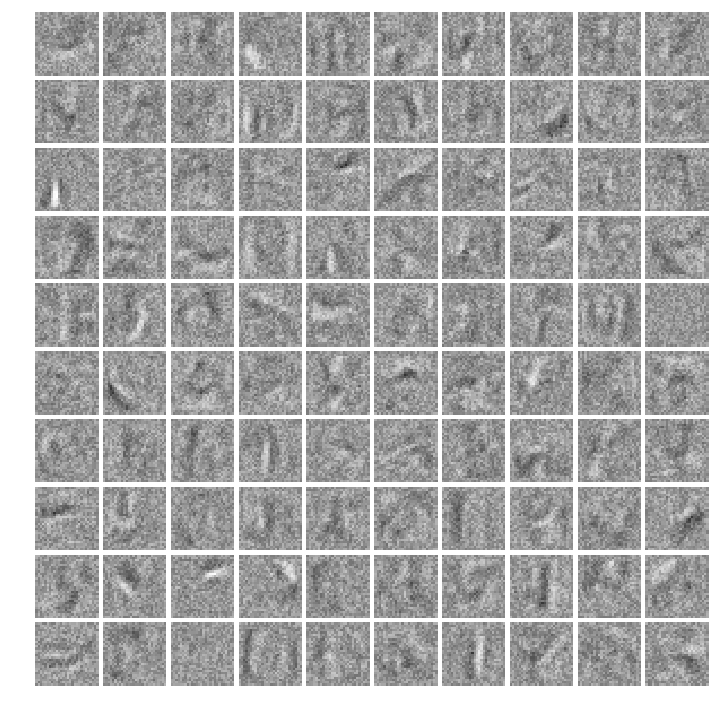

(<matplotlib.figure.Figure at 0x1a28f6c4a8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a293f4e80>)

In [46]:
visualise_first_layer_weights(best_param[0],fig_size=(10,10))

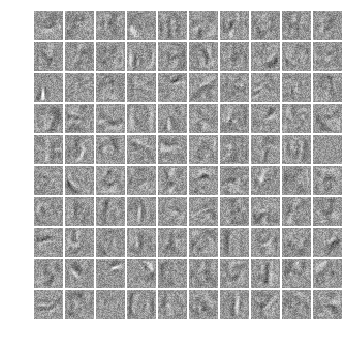

(<matplotlib.figure.Figure at 0x1a185d6d30>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a29428f28>)

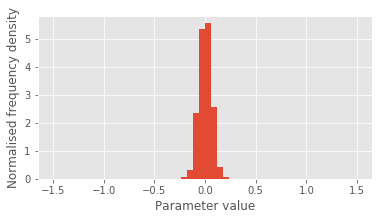

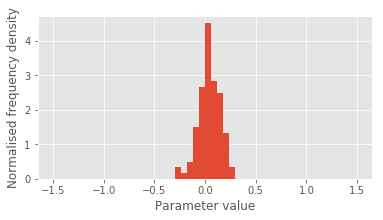

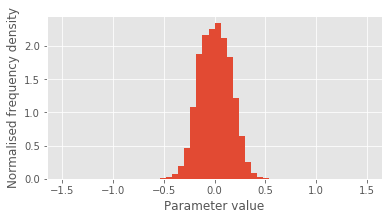

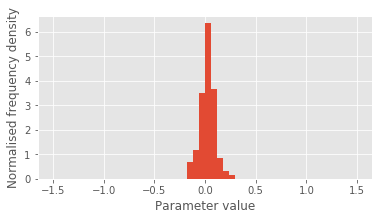

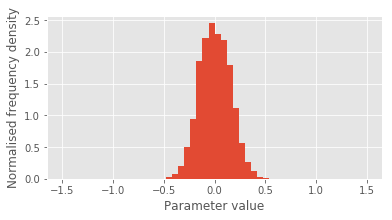

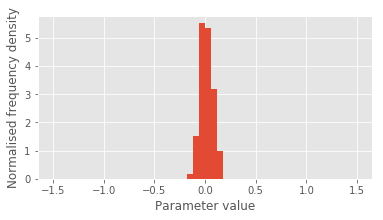

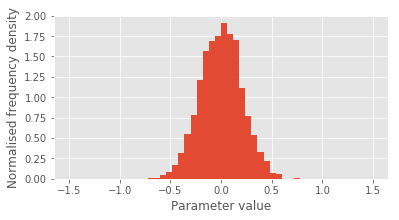

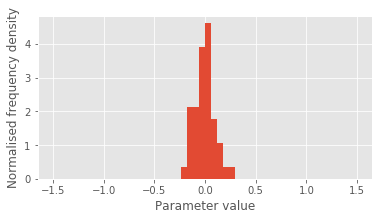

In [28]:
for i in range(len(best_param)):
    plot_param_histogram(best_param[i])
plt.show()

In [6]:
i=5

In [9]:
# reinitialisation of func needed for every expt!
train_data.reset()
test_data.reset()
valid_data.reset()

# Initialise the weights and biases:
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

m = [
    AffineLayerWithoutBias(input_dim, hidden_dim, weights_init),
    BatchNormalizationLayer(input_dim=hidden_dim, rng=rng, epsilon=1e-5),
    ReluLayer(),
    DropoutLayer(incl_prob=.75, rng=rng),
    AffineLayerWithoutBias(hidden_dim, hidden_dim, weights_init),
    BatchNormalizationLayer(input_dim=hidden_dim, rng=rng, epsilon=1e-5),
    ReluLayer(),
    DropoutLayer(incl_prob=.75, rng=rng),
    AffineLayerWithoutBias(hidden_dim, hidden_dim, weights_init),
    BatchNormalizationLayer(input_dim=hidden_dim, rng=rng, epsilon=1e-5),
    ReluLayer(),
    DropoutLayer(incl_prob=.75, rng=rng),
    AffineLayerWithoutBias(hidden_dim, hidden_dim, weights_init),
    BatchNormalizationLayer(input_dim=hidden_dim, rng=rng, epsilon=1e-5),
    ReluLayer(),
    DropoutLayer(incl_prob=.75, rng=rng),
    AffineLayerWithoutBias(hidden_dim, output_dim, weights_init)
]

# create the MLP:
model = MultipleLayerModel(m)
print(model)

error = CrossEntropyLogSoftmaxError()
learning_rule = AdamLearningRule(learning_rate=0.001)

output2 = train_model_and_plot_stats(
    model,
    error,
    learning_rule,
    train_data,
    valid_data,
    test_data,
    num_epochs,
    stats_interval,
    notebook=False)


MultiLayerModel(
    AffineLayerWithoutBias(input_dim=784, output_dim=100)
    BatchNormalizationLayer(input_dim=100)
    ReluLayer
    DropoutLayer(incl_prob=0.8)
    AffineLayerWithoutBias(input_dim=100, output_dim=100)
    BatchNormalizationLayer(input_dim=100)
    ReluLayer
    DropoutLayer(incl_prob=0.8)
    AffineLayerWithoutBias(input_dim=100, output_dim=100)
    BatchNormalizationLayer(input_dim=100)
    ReluLayer
    DropoutLayer(incl_prob=0.8)
    AffineLayerWithoutBias(input_dim=100, output_dim=100)
    BatchNormalizationLayer(input_dim=100)
    ReluLayer
    DropoutLayer(incl_prob=0.8)
    AffineLayerWithoutBias(input_dim=100, output_dim=47)
)


Epoch 1: 6.6s to complete
    error(train)=2.64e+00, acc(train)=2.84e-01, error(valid)=2.64e+00, acc(valid)=2.82e-01, error(test)=2.66e+00, acc(test)=2.74e-01
Epoch 2: 6.6s to complete
    error(train)=2.25e+00, acc(train)=3.86e-01, error(valid)=2.25e+00, acc(valid)=3.88e-01, error(test)=2.27e+00, acc(test)=3.78e-01
Epoch 3: 6.6s to complete
    error(train)=1.90e+00, acc(train)=4.57e-01, error(valid)=1.89e+00, acc(valid)=4.56e-01, error(test)=1.92e+00, acc(test)=4.52e-01
Epoch 4: 6.6s to complete
    error(train)=1.83e+00, acc(train)=4.69e-01, error(valid)=1.83e+00, acc(valid)=4.72e-01, error(test)=1.86e+00, acc(test)=4.59e-01
Epoch 5: 6.6s to complete
    error(train)=1.67e+00, acc(train)=5.20e-01, error(valid)=1.68e+00, acc(valid)=5.20e-01, error(test)=1.70e+00, acc(test)=5.09e-01
Epoch 6: 6.6s to complete
    error(train)=1.63e+00, acc(train)=5.24e-01, error(valid)=1.63e+00, acc(valid)=5.23e-01, error(test)=1.66e+00, acc(test)=5.12e-01
Epoch 7: 6.6s to complete
    error(train)=1.5

limit_output extension: Maximum message size of 5000 exceeded with 5135 characters

In [14]:
a = output2[-2]
plt

# A1 :: Baseline Experimens using DNN on EMNIST

Using the same parameters as in coursework1:
- training parameters:
    - epoch number = 100
    - learning rate = 0.01

## Experiment 1,2 : Changing number of hidden layers (2-10) , Activation Function

Experiment procedure:

1) The following parameters are fixed, while the only changes to each iteration of the experiment is the number of hidden layers:

    - gradient descent learning rule: vanilla SGD
    - weights initialisation method: `GlorotUniformInit` (Xavier init) as in [1]
    - Number of nodes in each hidden layer (100)
    - training rate/ number of epochs
    
2) Statistics for each sub-experiment (with different number of hidden layer) were collected

================================

[1] Glorot, X., Benigo, Y., 2010 Understanding the difficulty of training deep feedforwrd neural network

### Sigmoid Activation Function

In [6]:
func = SigmoidLayer()
experiment_layers_sigmoid = {}

In [8]:
from mlp.helper import *
i=0
train_data.reset()
test_data.reset()
valid_data.reset()

# Initialise the weights and biases:
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

input_layer = [
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init)
]
output_layer = [
    func,
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
]
each_hidden_layer = [
    func,
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init)
]

# create the MLP:
model = MultipleLayerModel(input_layer + each_hidden_layer * i +
                           output_layer)
print(model, '{} layers'.format(i + 1))

error = CrossEntropyLogSoftmaxError()
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

_ = train_model_and_plot_stats(
    model,
    error,
    learning_rule,
    train_data,
    valid_data,
    test_data,
    num_epochs,
    stats_interval)


MultiLayerModel(
    AffineLayer(input_dim=784, output_dim=100)
    SigmoidLayer
    AffineLayer(input_dim=100, output_dim=47)
) 1 layers


Epoch 1: 4.4s to complete
    error(train)=3.60e+00, acc(train)=2.64e-01, error(valid)=3.60e+00, acc(valid)=2.62e-01, error(test)=3.61e+00, acc(test)=2.53e-01
Epoch 2: 4.4s to complete
    error(train)=3.32e+00, acc(train)=3.60e-01, error(valid)=3.33e+00, acc(valid)=3.60e-01, error(test)=3.33e+00, acc(test)=3.45e-01
Epoch 3: 4.5s to complete
    error(train)=3.03e+00, acc(train)=4.14e-01, error(valid)=3.03e+00, acc(valid)=4.13e-01, error(test)=3.04e+00, acc(test)=4.01e-01
Epoch 4: 4.6s to complete
    error(train)=2.76e+00, acc(train)=4.53e-01, error(valid)=2.76e+00, acc(valid)=4.50e-01, error(test)=2.77e+00, acc(test)=4.38e-01
Epoch 5: 4.5s to complete
    error(train)=2.52e+00, acc(train)=4.82e-01, error(valid)=2.52e+00, acc(valid)=4.80e-01, error(test)=2.53e+00, acc(test)=4.74e-01
Epoch 6: 4.6s to complete
    error(train)=2.32e+00, acc(train)=5.06e-01, error(valid)=2.32e+00, acc(valid)=5.01e-01, error(test)=2.33e+00, acc(test)=4.96e-01
Epoch 7: 4.4s to complete
    error(train)=2.1

limit_output extension: Maximum message size of 5000 exceeded with 5089 characters

In [ ]:
for i in range(1, 10):
    train_data.reset()
    test_data.reset()
    valid_data.reset()

    # Initialise the weights and biases:
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    input_layer = [
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init)
    ]
    output_layer = [
        func,
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ]
    each_hidden_layer = [
        func,
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init)
    ]

    # create the MLP:
    model = MultipleLayerModel(input_layer + each_hidden_layer * i +
                               output_layer)
    print(model, '{} layers'.format(i + 1))

    error = CrossEntropyLogSoftmaxError()
    learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

    experiment_layers_sigmoid[i + 1] = train_model_and_plot_stats(
        model,
        error,
        learning_rule,
        train_data,
        valid_data,
        test_data,
        num_epochs,
        stats_interval,
        notebook=False)

MultiLayerModel(
    AffineLayer(input_dim=784, output_dim=100)
    SigmoidLayer
    AffineLayer(input_dim=100, output_dim=100)
    SigmoidLayer
    AffineLayer(input_dim=100, output_dim=47)
) 2 layers


Epoch 1: 2.4s to complete
    error(train)=3.83e+00, acc(train)=4.83e-02, error(valid)=3.83e+00, acc(valid)=4.80e-02, error(test)=3.83e+00, acc(test)=4.70e-02
Epoch 2: 2.4s to complete
    error(train)=3.81e+00, acc(train)=8.05e-02, error(valid)=3.81e+00, acc(valid)=7.62e-02, error(test)=3.81e+00, acc(test)=7.95e-02
Epoch 3: 2.4s to complete
    error(train)=3.79e+00, acc(train)=1.52e-01, error(valid)=3.79e+00, acc(valid)=1.51e-01, error(test)=3.79e+00, acc(test)=1.53e-01
Epoch 4: 2.4s to complete
    error(train)=3.75e+00, acc(train)=1.90e-01, error(valid)=3.76e+00, acc(valid)=1.87e-01, error(test)=3.76e+00, acc(test)=1.83e-01
Epoch 5: 2.4s to complete
    error(train)=3.71e+00, acc(train)=1.97e-01, error(valid)=3.71e+00, acc(valid)=1.96e-01, error(test)=3.71e+00, acc(test)=1.91e-01
Epoch 6: 2.4s to complete
    error(train)=3.63e+00, acc(train)=2.31e-01, error(valid)=3.63e+00, acc(valid)=2.24e-01, error(test)=3.63e+00, acc(test)=2.23e-01
Epoch 7: 2.4s to complete
    error(train)=3.5

limit_output extension: Maximum message size of 5000 exceeded with 5153 characters

Text(0.5,0,'epoch number')

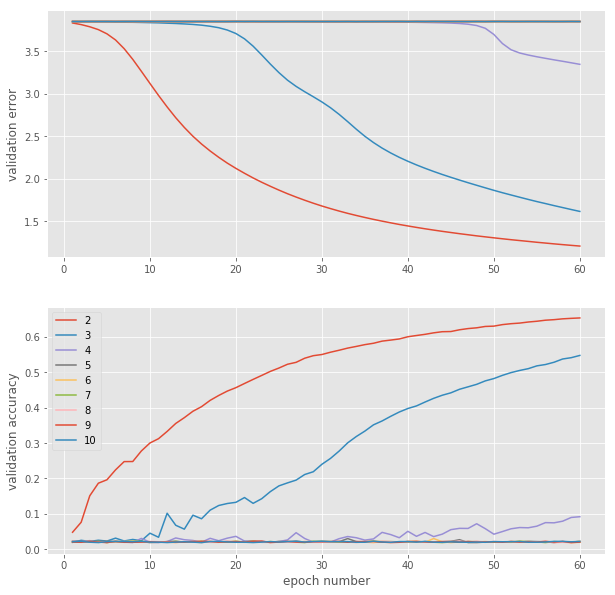

In [18]:
# Generate some statistics for SIGMOID layer:
final_valid_err_sigmoid = []
final_valid_acc_sigmoid = []

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for (layer, output) in experiment_layers_sigmoid.items():
    keys = output[1]
    stats = output[0]
    # Store the statistics for this model
    final_valid_err_sigmoid.append(stats[-1, keys['error(valid)']])
    final_valid_acc_sigmoid.append(stats[-1, keys['acc(valid)']])
    # plot the accuracy for each layer
    ax1.plot(
        np.arange(1, stats.shape[0]) * stats_interval,
        stats[1:, keys['error(valid)']])
    ax2.plot(
        np.arange(1, stats.shape[0]) * stats_interval,
        stats[1:, keys['acc(valid)']], 
        label=layer)
    
ax2.legend(loc='best');
ax1.set_ylabel('validation error')
ax2.set_ylabel('validation accuracy')
ax2.set_xlabel('epoch number')

### RELU Activation Function

In [ ]:
func = ReluLayer()
experiment_layers_relu = {}

In [ ]:
for i in range(1, 10):
    train_data.reset()
    test_data.reset()
    valid_data.reset()

    # Initialise the weights and biases:
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    input_layer = [
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init)
    ]
    output_layer = [
        func,
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ]
    each_hidden_layer = [
        func,
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init)
    ]

    # create the MLP:
    model = MultipleLayerModel(input_layer + each_hidden_layer * i +
                               output_layer)
    print(model, '{} layers'.format(i + 1))

    error = CrossEntropyLogSoftmaxError()
    learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

    experiment_layers_relu[i + 1] = train_model_and_plot_stats(
        model,
        error,
        learning_rule,
        train_data,
        valid_data,
        test_data,
        num_epochs,
        stats_interval,
        notebook=False)

Text(0.5,0,'epoch number')

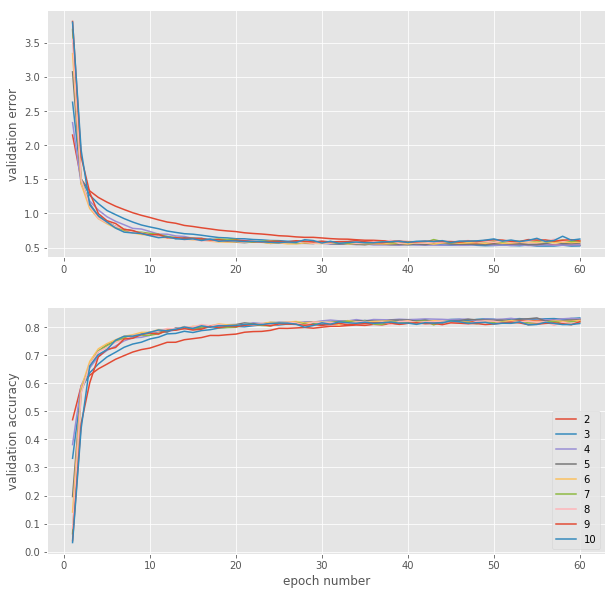

In [19]:
# Generate some statistics for RELU layer:
final_valid_err_relu = []
final_valid_acc_relu = []

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for (layer, output) in experiment_layers_relu.items():
    keys = output[1]
    stats = output[0]
    # Store the statistics for this model
    final_valid_err_relu.append(stats[-1, keys['error(valid)']])
    final_valid_acc_relu.append(stats[-1, keys['acc(valid)']])
    # plot the accuracy for each layer
    ax1.plot(
        np.arange(1, stats.shape[0]) * stats_interval,
        stats[1:, keys['error(valid)']])
    ax2.plot(
        np.arange(1, stats.shape[0]) * stats_interval,
        stats[1:, keys['acc(valid)']], 
        label=layer)
    
ax2.legend(loc='best');
ax1.set_ylabel('validation error')
ax2.set_ylabel('validation accuracy')
ax2.set_xlabel('epoch number')

### ELU Activation Function

In [ ]:
func = ELULayer()
experiment_layers_elu = {}

In [ ]:
for i in range(1, 10):
    train_data.reset()
    test_data.reset()
    valid_data.reset()

    # Initialise the weights and biases:
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    input_layer = [
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init)
    ]
    output_layer = [
        func,
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ]
    each_hidden_layer = [
        func,
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init)
    ]

    # create the MLP:
    model = MultipleLayerModel(input_layer + each_hidden_layer * i +
                               output_layer)
    print(model, '{} layers'.format(i + 1))

    error = CrossEntropyLogSoftmaxError()
    learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

    experiment_layers_elu[i + 1] = train_model_and_plot_stats(
        model,
        error,
        learning_rule,
        train_data,
        valid_data,
        test_data,
        num_epochs,
        stats_interval,
        notebook=False)

Text(0.5,0,'epoch number')

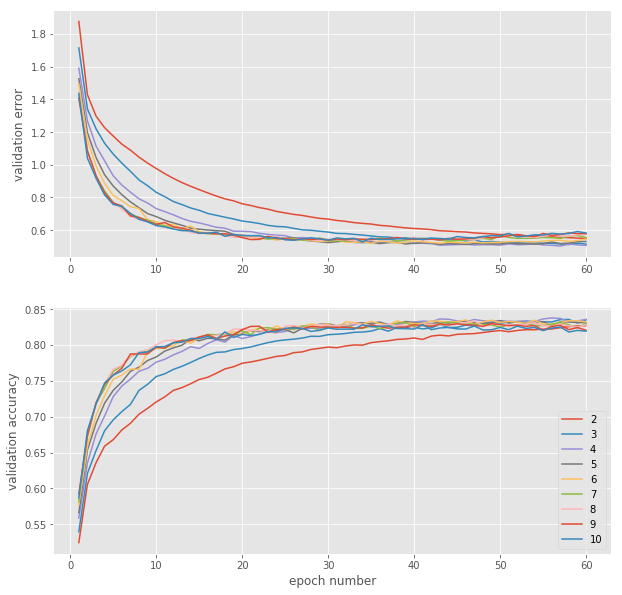

In [20]:
# Generate some statistics for SIGMOID layer:
final_valid_err_elu = []
final_valid_acc_elu = []

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for (layer, output) in experiment_layers_elu.items():
    keys = output[1]
    stats = output[0]
    # Store the statistics for this model
    final_valid_err_sigmoid.append(stats[-1, keys['error(valid)']])
    final_valid_acc_sigmoid.append(stats[-1, keys['acc(valid)']])
    # plot the accuracy for each layer
    ax1.plot(
        np.arange(1, stats.shape[0]) * stats_interval,
        stats[1:, keys['error(valid)']])
    ax2.plot(
        np.arange(1, stats.shape[0]) * stats_interval,
        stats[1:, keys['acc(valid)']], 
        label=layer)
    
ax2.legend(loc='best');
ax1.set_ylabel('validation error')
ax2.set_ylabel('validation accuracy')
ax2.set_xlabel('epoch number')

### SELU Activation Function

In [ ]:
func = SELULayer()
experiment_layers_selu = {}

In [ ]:
for i in range(1, 10):
    train_data.reset()
    test_data.reset()
    valid_data.reset()

    # Initialise the weights and biases:
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    input_layer = [
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init)
    ]
    output_layer = [
        func,
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ]
    each_hidden_layer = [
        func,
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init)
    ]

    # create the MLP:
    model = MultipleLayerModel(input_layer + each_hidden_layer * i +
                               output_layer)
    print(model, '{} layers'.format(i + 1))

    error = CrossEntropyLogSoftmaxError()
    learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

    experiment_layers_selu[i + 1] = train_model_and_plot_stats(
        model,
        error,
        learning_rule,
        train_data,
        valid_data,
        test_data,
        num_epochs,
        stats_interval,
        notebook=False)

Text(0.5,0,'epoch number')

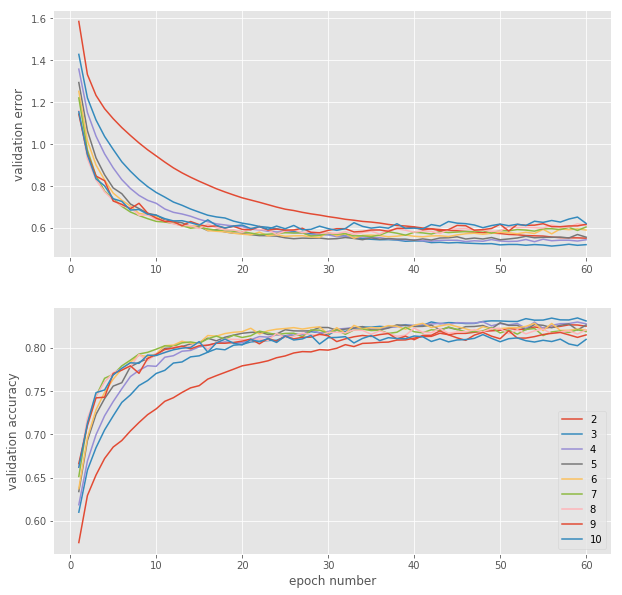

In [21]:
# Generate some statistics for SIGMOID layer:
final_valid_err_selu = []
final_valid_acc_selu = []

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for (layer, output) in experiment_layers_selu.items():
    keys = output[1]
    stats = output[0]
    # Store the statistics for this model
    final_valid_err_sigmoid.append(stats[-1, keys['error(valid)']])
    final_valid_acc_sigmoid.append(stats[-1, keys['acc(valid)']])
    # plot the accuracy for each layer
    ax1.plot(
        np.arange(1, stats.shape[0]) * stats_interval,
        stats[1:, keys['error(valid)']])
    ax2.plot(
        np.arange(1, stats.shape[0]) * stats_interval,
        stats[1:, keys['acc(valid)']], 
        label=layer)
    
ax2.legend(loc='best');
ax1.set_ylabel('validation error')
ax2.set_ylabel('validation accuracy')
ax2.set_xlabel('epoch number')

## Experiment 3: Changing number of hidden units
So far, all is 100 units, we can try to increase at intervals of 100 to size of the input_dim = 800;

Fixing the number of hidden layers at 10!

In [14]:
func = ELULayer()
experiment_DROPOUT = {}
hidden_dim = 400
i = 5 # + 1 = 10 layers

In [ ]:
func = ELULayer()
experiment_units_elu = {}
hidden_layers = 9  # + 1 = 10 layers

### 100-200-300-400

In [ ]:
hidden_units = [100, 200, 300, 400]
for hidden_dim in hidden_units:
    train_data.reset()
    test_data.reset()
    valid_data.reset()

    # Initialise the weights and biases:
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    input_layer = [
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init)
    ]
    output_layer = [
        func,
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ]
    each_hidden_layer = [
        func,
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init)
    ]

    # create the MLP:
    model = MultipleLayerModel(input_layer + each_hidden_layer * hidden_layers
                               + output_layer)
    print(model, '{} layers'.format(hidden_layers + 1))

    error = CrossEntropyLogSoftmaxError()
    learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

    experiment_units_elu[hidden_dim] = train_model_and_plot_stats(
        model,
        error,
        learning_rule,
        train_data,
        valid_data,
        test_data,
        num_epochs,
        stats_interval,
        notebook=False)

### 500-600-700

In [ ]:
hidden_units =[500, 600, 700]
for hidden_dim in hidden_units:
    train_data.reset()
    test_data.reset()
    valid_data.reset()

    # Initialise the weights and biases:
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    input_layer = [
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init)
    ]
    output_layer = [
        func,
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ]
    each_hidden_layer = [
        func,
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init)
    ]

    # create the MLP:
    model = MultipleLayerModel(input_layer + each_hidden_layer * hidden_layers
                               + output_layer)
    print(model, '{} layers'.format(hidden_layers + 1))

    error = CrossEntropyLogSoftmaxError()
    learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

    experiment_units_elu[hidden_dim] = train_model_and_plot_stats(
        model,
        error,
        learning_rule,
        train_data,
        valid_data,
        test_data,
        num_epochs,
        stats_interval,
        notebook=False)

## Experiment 4: Regularisers

### DropOut Layer

In [10]:
from mlp.layers import DropoutLayer

In [19]:
for incl_prob in [.9]:
    train_data.reset()
    test_data.reset()
    valid_data.reset()

    # Initialise the weights and biases:
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    input_layer = [
        DropoutLayer(rng=rng, incl_prob=incl_prob, share_across_batch=True),
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init)
    ]
    output_layer = [
        ELULayer(),
        DropoutLayer(rng=rng, incl_prob=incl_prob, share_across_batch=True),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ]
    each_hidden_layer = [
        ELULayer(),
        DropoutLayer(rng=rng, incl_prob=incl_prob, share_across_batch=True),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init)
    ]

    # create the MLP:
    model = MultipleLayerModel(input_layer + each_hidden_layer * i +
                               output_layer)
    print(model, '{} layers'.format(i + 1))

    error = CrossEntropyLogSoftmaxError()
    learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

    experiment_DROPOUT[incl_prob] = train_model_and_plot_stats(
        model,
        error,
        learning_rule,
        train_data,
        valid_data,
        test_data,
        num_epochs,
        stats_interval,
        notebook=False)

MultiLayerModel(
    DropoutLayer(incl_prob=0.9)
    AffineLayer(input_dim=784, output_dim=400)
    ELULayer
    DropoutLayer(incl_prob=0.9)
    AffineLayer(input_dim=400, output_dim=400)
    ELULayer
    DropoutLayer(incl_prob=0.9)
    AffineLayer(input_dim=400, output_dim=400)
    ELULayer
    DropoutLayer(incl_prob=0.9)
    AffineLayer(input_dim=400, output_dim=400)
    ELULayer
    DropoutLayer(incl_prob=0.9)
    AffineLayer(input_dim=400, output_dim=400)
    ELULayer
    DropoutLayer(incl_prob=0.9)
    AffineLayer(input_dim=400, output_dim=400)
    ELULayer
    DropoutLayer(incl_prob=0.9)
    AffineLayer(input_dim=400, output_dim=47)
) 6 layers


Epoch 1: 39.4s to complete
    error(train)=1.70e+00, acc(train)=5.14e-01, error(valid)=1.69e+00, acc(valid)=5.16e-01, error(test)=1.72e+00, acc(test)=5.04e-01
Epoch 2: 39.5s to complete
    error(train)=1.39e+00, acc(train)=5.93e-01, error(valid)=1.40e+00, acc(valid)=5.87e-01, error(test)=1.42e+00, acc(test)=5.79e-01
Epoch 3: 39.5s to complete
    error(train)=1.24e+00, acc(train)=6.31e-01, error(valid)=1.23e+00, acc(valid)=6.33e-01, error(test)=1.27e+00, acc(test)=6.21e-01
Epoch 4: 39.6s to complete
    error(train)=1.14e+00, acc(train)=6.52e-01, error(valid)=1.15e+00, acc(valid)=6.52e-01, error(test)=1.18e+00, acc(test)=6.41e-01
Epoch 5: 39.9s to complete
    error(train)=1.06e+00, acc(train)=6.72e-01, error(valid)=1.06e+00, acc(valid)=6.75e-01, error(test)=1.08e+00, acc(test)=6.62e-01
Epoch 6: 39.0s to complete
    error(train)=1.00e+00, acc(train)=6.87e-01, error(valid)=1.02e+00, acc(valid)=6.83e-01, error(test)=1.04e+00, acc(test)=6.73e-01
Epoch 7: 39.7s to complete
    error(tra

limit_output extension: Maximum message size of 5000 exceeded with 5157 characters

Text(0.5,0,'epoch number')

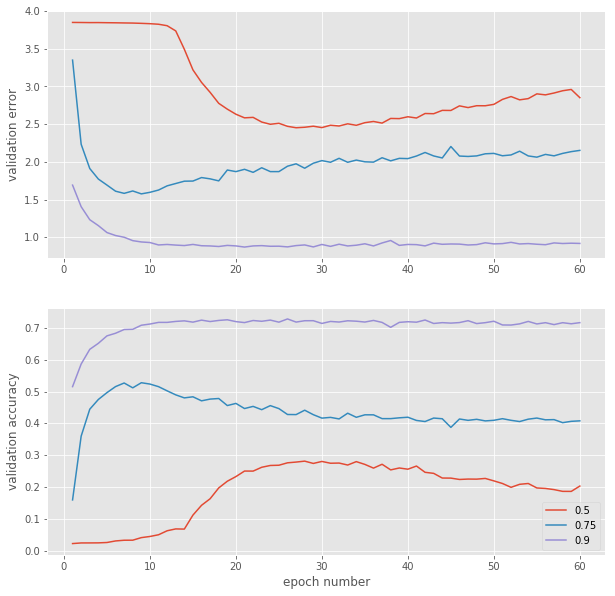

In [20]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for (layer, output) in experiment_DROPOUT.items():
    keys = output[1]
    stats = output[0]
    # plot the accuracy for each layer
    ax1.plot(
        np.arange(1, stats.shape[0]) * stats_interval,
        stats[1:, keys['error(valid)']])
    ax2.plot(
        np.arange(1, stats.shape[0]) * stats_interval,
        stats[1:, keys['acc(valid)']], 
        label=layer)
    
ax2.legend(loc='best');
ax1.set_ylabel('validation error')
ax2.set_ylabel('validation accuracy')
ax2.set_xlabel('epoch number')

Text(0.5,0,'epoch number')

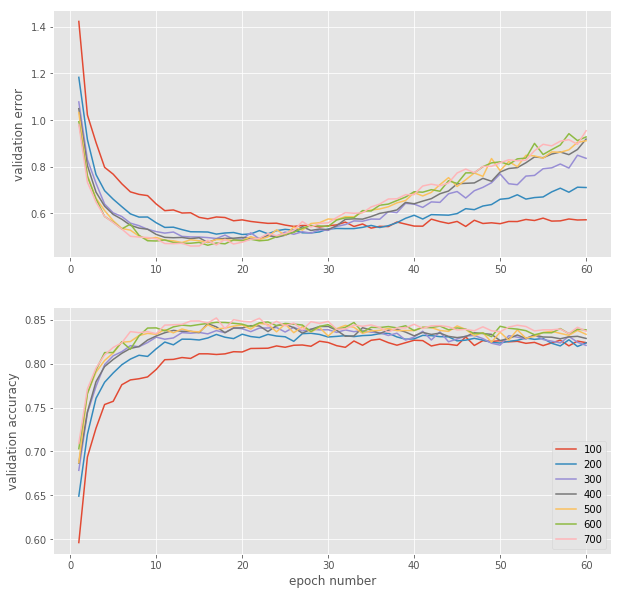

In [22]:
exfig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for (layer, output) in experiment_units_elu.items():
    keys = output[1]
    stats = output[0]
    # plot the accuracy for each layer
    ax1.plot(
        np.arange(1, stats.shape[0]) * stats_interval,
        stats[1:, keys['error(valid)']])
    ax2.plot(
        np.arange(1, stats.shape[0]) * stats_interval,
        stats[1:, keys['acc(valid)']], 
        label=layer)
    
ax2.legend(loc='best');
ax1.set_ylabel('validation error')
ax2.set_ylabel('validation accuracy')
ax2.set_xlabel('epoch number')

# Learning Rule (A2-A3)
Perform experiments to compare `stochastic gradient descent`, `RMSProp`, and `Adam` for deep neural network
training on EMNIST Balanced , building on your earlier baseline experiments.

## Stochastic Gradient Descent (SGD)

## RMSProp

In [39]:
from mlp.learning_rules import RMSPropLearningRule

In [ ]:
expt_LR_RMS = {}
hidden_dim = 500

In [ ]:
for i in range(1,10):
    train_data.reset()
    test_data.reset()
    valid_data.reset()

    # Initialise the weights and biases:
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    input_layer = [
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init)
    ]
    output_layer = [
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ]
    each_hidden_layer = [
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init)
    ]

    # create the MLP:
    model = MultipleLayerModel(input_layer + each_hidden_layer * i +
                               output_layer)
    print(model, '{} layers'.format(i + 1))

    error = CrossEntropyLogSoftmaxError()
    learning_rule = RMSPropLearningRule() # Use default parameters here

    expt_LR_RMS[i+1] = train_model_and_plot_stats(
        model,
        error,
        learning_rule,
        train_data,
        valid_data,
        test_data,
        num_epochs,
        stats_interval,
        notebook=False)

MultiLayerModel(
    AffineLayer(input_dim=784, output_dim=500)
    ReluLayer
    AffineLayer(input_dim=500, output_dim=500)
    ReluLayer
    AffineLayer(input_dim=500, output_dim=47)
) 2 layers


Epoch 1: 22.1s to complete
    error(train)=5.53e-01, acc(train)=8.17e-01, error(valid)=5.94e-01, acc(valid)=8.06e-01, error(test)=6.38e-01, acc(test)=7.94e-01
Epoch 2: 22.0s to complete
    error(train)=4.18e-01, acc(train)=8.54e-01, error(valid)=4.94e-01, acc(valid)=8.34e-01, error(test)=5.48e-01, acc(test)=8.17e-01
Epoch 3: 22.1s to complete
    error(train)=3.54e-01, acc(train)=8.74e-01, error(valid)=4.79e-01, acc(valid)=8.43e-01, error(test)=5.20e-01, acc(test)=8.32e-01
Epoch 4: 21.9s to complete
    error(train)=3.03e-01, acc(train)=8.90e-01, error(valid)=4.56e-01, acc(valid)=8.53e-01, error(test)=5.09e-01, acc(test)=8.41e-01
Epoch 5: 21.4s to complete
    error(train)=2.76e-01, acc(train)=8.99e-01, error(valid)=4.69e-01, acc(valid)=8.51e-01, error(test)=5.22e-01, acc(test)=8.42e-01
Epoch 6: 21.6s to complete
    error(train)=2.54e-01, acc(train)=9.04e-01, error(valid)=4.96e-01, acc(valid)=8.52e-01, error(test)=5.47e-01, acc(test)=8.46e-01
Epoch 7: 21.7s to complete
    error(tra

limit_output extension: Maximum message size of 5000 exceeded with 5017 characters

Text(0.5,0,'epoch number')

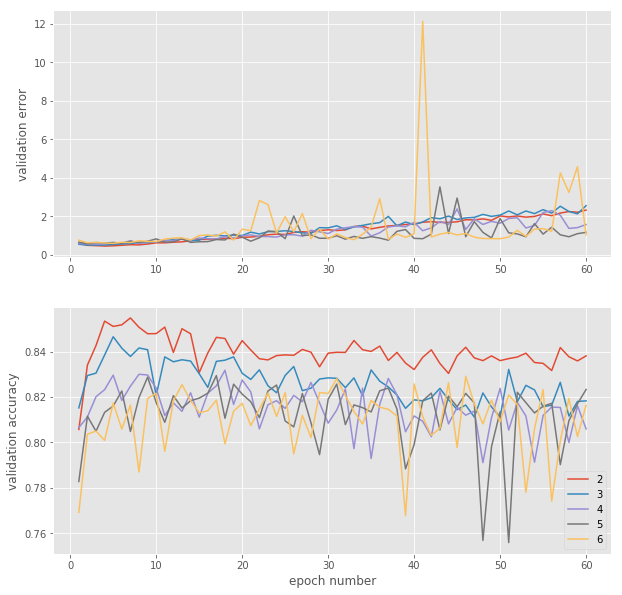

In [42]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for (layer, output) in expt_LR_RMS.items():
    keys = output[1]
    stats = output[0]
    # Store the statistics for this model
    #     final_valid_err_sigmoid.append(stats[-1, keys['error(valid)']])
    #     final_valid_acc_sigmoid.append(stats[-1, keys['acc(valid)']])
    # plot the accuracy for each layer
    ax1.plot(
        np.arange(1, stats.shape[0]) * stats_interval,
        stats[1:, keys['error(valid)']])
    ax2.plot(
        np.arange(1, stats.shape[0]) * stats_interval,
        stats[1:, keys['acc(valid)']], 
        label=layer)
    
ax2.legend(loc='best');
ax1.set_ylabel('validation error')
ax2.set_ylabel('validation accuracy')
ax2.set_xlabel('epoch number')

## Adam Learning Rule

In [43]:
from mlp.learning_rules import AdamLearningRule

In [ ]:
expt_LR_ADAM = {}
hidden_dim = 500

In [ ]:
for i in range(7,8):
    train_data.reset()
    test_data.reset()
    valid_data.reset()

    # Initialise the weights and biases:
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    input_layer = [
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init)
    ]
    output_layer = [
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ]
    each_hidden_layer = [
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init)
    ]

    # create the MLP:
    model = MultipleLayerModel(input_layer + each_hidden_layer * i +
                               output_layer)
    print(model, '{} layers'.format(i + 1))

    error = CrossEntropyLogSoftmaxError()
    learning_rule = AdamLearningRule() # Use default parameters here

    expt_LR_ADAM[i+1] = train_model_and_plot_stats(
        model,
        error,
        learning_rule,
        train_data,
        valid_data,
        test_data,
        num_epochs,
        stats_interval,
        notebook=False)

MultiLayerModel(
    AffineLayer(input_dim=784, output_dim=500)
    ReluLayer
    AffineLayer(input_dim=500, output_dim=500)
    ReluLayer
    AffineLayer(input_dim=500, output_dim=500)
    ReluLayer
    AffineLayer(input_dim=500, output_dim=500)
    ReluLayer
    AffineLayer(input_dim=500, output_dim=500)
    ReluLayer
    AffineLayer(input_dim=500, output_dim=500)
    ReluLayer
    AffineLayer(input_dim=500, output_dim=500)
    ReluLayer
    AffineLayer(input_dim=500, output_dim=500)
    ReluLayer
    AffineLayer(input_dim=500, output_dim=47)
) 8 layers


Epoch 1: 94.8s to complete
    error(train)=7.51e-01, acc(train)=7.61e-01, error(valid)=8.01e-01, acc(valid)=7.50e-01, error(test)=8.28e-01, acc(test)=7.42e-01
Epoch 2: 94.9s to complete
    error(train)=5.55e-01, acc(train)=8.18e-01, error(valid)=6.18e-01, acc(valid)=8.05e-01, error(test)=6.49e-01, acc(test)=7.96e-01
Epoch 3: 95.4s to complete
    error(train)=5.20e-01, acc(train)=8.28e-01, error(valid)=6.08e-01, acc(valid)=8.07e-01, error(test)=6.49e-01, acc(test)=7.96e-01
Epoch 4: 94.7s to complete
    error(train)=4.77e-01, acc(train)=8.40e-01, error(valid)=5.87e-01, acc(valid)=8.13e-01, error(test)=6.02e-01, acc(test)=8.10e-01
Epoch 5: 95.3s to complete
    error(train)=4.86e-01, acc(train)=8.37e-01, error(valid)=6.01e-01, acc(valid)=8.12e-01, error(test)=6.36e-01, acc(test)=8.01e-01
Epoch 6: 94.6s to complete
    error(train)=4.44e-01, acc(train)=8.50e-01, error(valid)=5.84e-01, acc(valid)=8.24e-01, error(test)=6.00e-01, acc(test)=8.15e-01
Epoch 7: 109.4s to complete
    error(tr

In [52]:
expt_LR_ADAM.keys()

dict_keys([2, 3, 4, 5, 6, 7, 9, 10, 8])

Text(0.5,0,'epoch number')

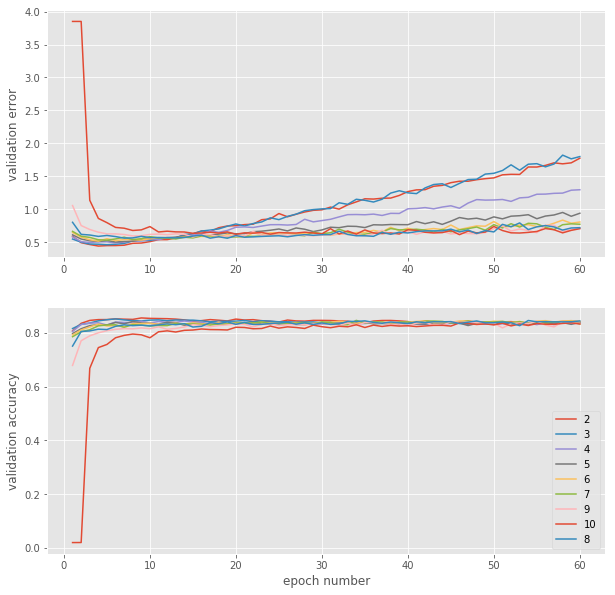

In [57]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for (layer, output) in expt_LR_ADAM.items():
    keys = output[1]
    stats = output[0]
    # Store the statistics for this model
    #     final_valid_err_sigmoid.append(stats[-1, keys['error(valid)']])
    #     final_valid_acc_sigmoid.append(stats[-1, keys['acc(valid)']])
    # plot the accuracy for each layer
    ax1.plot(
        np.arange(1, stats.shape[0]) * stats_interval,
        stats[1:, keys['error(valid)']])
    ax2.plot(
        np.arange(1, stats.shape[0]) * stats_interval,
        stats[1:, keys['acc(valid)']], 
        label=layer)
    
ax2.legend(loc='best');
ax1.set_ylabel('validation error')
ax2.set_ylabel('validation accuracy')
ax2.set_xlabel('epoch number')

# BatchNorm Layer (A4-A7)
Perform experiments on EMNIST Balanced to investigate the impact of using batch normalisation in deep neural networks, building on your earlier experiments.


Each Layer:
- ...
- previous layer output
- Batch norm layer
- activation function layer
- ...

## Sigmoid + BatchNorm 

In [27]:
# It is said the batchnorm prevent the network fro getting stuck in the saturated nodes - try with sigmoid:

In [ ]:
for trial in [2,3]:
    experiment_layers_BN_sigmoid = {}    
    for i in [1,3,5,7]:
        # reinitialisation of func needed for every expt!
        train_data.reset()
        test_data.reset()
        valid_data.reset()

        # Initialise the weights and biases:
        weights_init = GlorotUniformInit(rng=rng)
        biases_init = ConstantInit(0.)

        input_layer = [
            AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
            BatchNormalizationLayer(input_dim=hidden_dim, rng=rng)
        ]
        output_layer = [
            SigmoidLayer(),
            AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
        ]
        each_hidden_layer = [
            SigmoidLayer(),
            AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
            BatchNormalizationLayer(input_dim=hidden_dim, rng=rng),
        ]

        # create the MLP:
        model = MultipleLayerModel(input_layer + each_hidden_layer * i +
                                   output_layer)
        print(model, '{} layers'.format(i + 1))

        error = CrossEntropyLogSoftmaxError()
        learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

        experiment_layers_BN_sigmoid[i + 1] = train_model_and_plot_stats(
            model,
            error,
            learning_rule,
            train_data,
            valid_data,
            test_data,
            num_epochs,
            stats_interval,
            notebook=False)
        # Save the stuff:
    pkl.dump(experiment_layers_BN_sigmoid, open('./experiment_layers_BN_sigmoid.{}.pkl'.format(trial), 'wb'), protocol=-1)

MultiLayerModel(
    AffineLayer(input_dim=784, output_dim=400)
    BatchNormalizationLayer(input_dim=400)
    SigmoidLayer
    AffineLayer(input_dim=400, output_dim=400)
    BatchNormalizationLayer(input_dim=400)
    SigmoidLayer
    AffineLayer(input_dim=400, output_dim=47)
) 2 layers


Epoch 1: 12.5s to complete
    error(train)=2.79e+00, acc(train)=4.78e-01, error(valid)=2.79e+00, acc(valid)=4.77e-01, error(test)=2.80e+00, acc(test)=4.69e-01
Epoch 2: 12.5s to complete
    error(train)=2.32e+00, acc(train)=5.60e-01, error(valid)=2.32e+00, acc(valid)=5.58e-01, error(test)=2.34e+00, acc(test)=5.50e-01
Epoch 3: 12.6s to complete
    error(train)=2.02e+00, acc(train)=5.95e-01, error(valid)=2.03e+00, acc(valid)=5.94e-01, error(test)=2.04e+00, acc(test)=5.83e-01
Epoch 4: 12.7s to complete
    error(train)=1.82e+00, acc(train)=6.19e-01, error(valid)=1.82e+00, acc(valid)=6.13e-01, error(test)=1.83e+00, acc(test)=6.04e-01
Epoch 5: 12.5s to complete
    error(train)=1.66e+00, acc(train)=6.37e-01, error(valid)=1.67e+00, acc(valid)=6.33e-01, error(test)=1.68e+00, acc(test)=6.23e-01


## ELU + BatchNorm

In [7]:
hidden_dim = 100
i = 6
num_epochs = 60

In [16]:
from mlp.penalty import *

In [ ]:
# reinitialisation of func needed for every expt!
train_data.reset()
test_data.reset()
valid_data.reset()

# Initialise the weights and biases:
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

input_layer = [
    AffineLayerWithoutBias(input_dim, hidden_dim, weights_init),
    BatchNormalizationLayer(input_dim=hidden_dim, rng=rng)
]
output_layer = [
    ReluLayer(),
    AffineLayerWithoutBias(hidden_dim, output_dim, weights_init)
]
each_hidden_layer = [
    ReluLayer(),
    AffineLayerWithoutBias(hidden_dim, hidden_dim, weights_init),
    BatchNormalizationLayer(input_dim=hidden_dim, rng=rng)
]

# create the MLP:
model = MultipleLayerModel(input_layer + each_hidden_layer * i +
                           output_layer)
print(model, '{} layers'.format(i + 1))

error = CrossEntropyLogSoftmaxError()
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate*20)

output = train_model_and_plot_stats(
    model,
    error,
    learning_rule,
    train_data,
    valid_data,
    test_data,
    num_epochs,
    stats_interval,
    notebook=False)


MultiLayerModel(
    AffineLayerWithoutBias(input_dim=784, output_dim=100)
    BatchNormalizationLayer(input_dim=100)
    ReluLayer
    AffineLayerWithoutBias(input_dim=100, output_dim=100)
    BatchNormalizationLayer(input_dim=100)
    ReluLayer
    AffineLayerWithoutBias(input_dim=100, output_dim=100)
    BatchNormalizationLayer(input_dim=100)
    ReluLayer
    AffineLayerWithoutBias(input_dim=100, output_dim=100)
    BatchNormalizationLayer(input_dim=100)
    ReluLayer
    AffineLayerWithoutBias(input_dim=100, output_dim=100)
    BatchNormalizationLayer(input_dim=100)
    ReluLayer
    AffineLayerWithoutBias(input_dim=100, output_dim=100)
    BatchNormalizationLayer(input_dim=100)
    ReluLayer
    AffineLayerWithoutBias(input_dim=100, output_dim=100)
    BatchNormalizationLayer(input_dim=100)
    ReluLayer
    AffineLayerWithoutBias(input_dim=100, output_dim=47)
) 7 layers


/Users/weiting/miniconda3/envs/mlp/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/weiting/miniconda3/envs/mlp/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/weiting/MLP2k1718/mlp/layers.py:630: RuntimeWarning: invalid value encountered in maximum
  return np.maximum(inputs, 0.)


hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
h

limit_output extension: Maximum message size of 5000 exceeded with 5034 characters

In [26]:

output

[autoreload of mlp.layers failed: Traceback (most recent call last):
  File "/Users/weiting/miniconda3/envs/mlp/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 246, in check
    superreload(m, reload, self.old_objects)
  File "/Users/weiting/miniconda3/envs/mlp/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 369, in superreload
    module = reload(module)
  File "/Users/weiting/miniconda3/envs/mlp/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/Users/weiting/miniconda3/envs/mlp/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/weiting/MLP2k1718/mlp/layers.py", line 1082, in <module>
    @jit(nopython=True)
NameError: name 'jit' is not defined

(array([[  4.15167970e+00,   2.14200000e-02,   4.15183427e+00,
           1.87974684e-02,   4.13782850e+00,   2.28481013e-02],
        [  3.87105162e+00,   2.13500000e-02,   3.87066435e+00,
           2.01898734e-02,   3.86864652e+00,   2.18987342e-02],
        [  3.86498192e+00,   2.13500000e-02,   3.86447756e+00,
           2.01898734e-02,   3.86236720e+00,   2.18987342e-02],
        [  3.86456247e+00,   2.13500000e-02,   3.86257947e+00,
           2.01898734e-02,   3.86267877e+00,   2.18987342e-02],
        [  3.86047729e+00,   2.13500000e-02,   3.85970108e+00,
           2.01898734e-02,   3.85971510e+00,   2.18987342e-02],
        [  3.85631657e+00,   2.13500000e-02,   3.85488216e+00,
           2.01898734e-02,   3.85582358e+00,   2.18987342e-02],
        [  3.85760662e+00,   2.14700000e-02,   3.85668083e+00,
           2.06962025e-02,   3.85672051e+00,   2.06329114e-02],
        [  3.85519808e+00,   2.14700000e-02,   3.85436763e+00,
           2.06962025e-02,   3.85452055e+00,   2

In [17]:
output

(MultiLayerModel(
     AffineLayer(input_dim=784, output_dim=400)
     ReluLayer
     AffineLayer(input_dim=400, output_dim=400)
     BatchNormalizationLayer(input_dim=400)
     ReluLayer
     AffineLayer(input_dim=400, output_dim=400)
     BatchNormalizationLayer(input_dim=400)
     ReluLayer
     AffineLayer(input_dim=400, output_dim=400)
     BatchNormalizationLayer(input_dim=400)
     ReluLayer
     AffineLayer(input_dim=400, output_dim=47)
 ), array([[  4.19896530e+00,   2.09400000e-02,   4.18717695e+00,
           2.38607595e-02,   4.20293471e+00,   2.08227848e-02],
        [  9.48874317e+00,   3.05000000e-01,   9.61651580e+00,
           3.09430380e-01,   9.60659577e+00,   2.99873418e-01],
        [  2.40918072e+01,   2.74190000e-01,   2.42726556e+01,
           2.76518987e-01,   2.44244280e+01,   2.70000000e-01],
        [  3.80848289e+01,   2.77090000e-01,   3.86044075e+01,
           2.80063291e-01,   3.90475442e+01,   2.70632911e-01],
        [  5.72378376e+01,   2.79290000e

In [ ]:
Epoch 1: 32.7s to complete
    error(train)=7.77e+01, acc(train)=1.39e-01, error(valid)=7.78e+01, acc(valid)=1.41e-01, error(test)=7.82e+01, acc(test)=1.37e-01
Epoch 2: 32.6s to complete
    error(train)=6.20e+02, acc(train)=7.33e-02, error(valid)=6.18e+02, acc(valid)=7.08e-02, error(test)=6.20e+02, acc(test)=7.26e-02
Epoch 3: 32.8s to complete
    error(train)=1.73e+03, acc(train)=9.15e-02, error(valid)=1.73e+03, acc(valid)=9.25e-02, error(test)=1.74e+03, acc(test)=9.06e-02
Epoch 4: 32.8s to complete
    error(train)=3.10e+03, acc(train)=1.16e-01, error(valid)=3.10e+03, acc(valid)=1.18e-01, error(test)=3.12e+03, acc(test)=1.14e-01
Epoch 5: 32.7s to complete
    error(train)=6.40e+03, acc(train)=1.03e-01, error(valid)=6.41e+03, acc(valid)=1.05e-01, error(test)=6.44e+03, acc(test)=1.01e-01
Epoch 6: 32.8s to complete
    error(train)=1.00e+04, acc(train)=9.58e-02, error(valid)=1.00e+04, acc(valid)=1.00e-01, error(test)=1.01e+04, acc(test)=9.59e-02
Epoch 7: 32.6s to complete
    error(train)=1.43e+04, acc(train)=9.77e-02, error(valid)=1.43e+04, acc(valid)=1.02e-01, error(test)=1.44e+04, acc(test)=9.69e-02
Epoch 8: 32.7s to complete
    error(train)=1.84e+04, acc(train)=1.03e-01, error(valid)=1.84e+04, acc(valid)=1.08e-01, error(test)=1.86e+04, acc(test)=1.01e-01
Epoch 9: 32.8s to complete
    error(train)=2.52e+04, acc(train)=9.84e-02, error(valid)=2.52e+04, acc(valid)=1.04e-01, error(test)=2.54e+04, acc(test)=9.61e-02
Epoch 10: 32.9s to complete
    error(train)=3.39e+04, acc(train)=9.55e-02, error(valid)=3.40e+04, acc(valid)=9.92e-02, error(test)=3.42e+04, acc(test)=9.37e-02
Epoch 11: 32.8s to complete
    error(train)=4.45e+04, acc(train)=9.11e-02, error(valid)=4.46e+04, acc(valid)=9.65e-02, error(test)=4.49e+04, acc(test)=9.14e-02
    

In [15]:
# reinitialisation of func needed for every expt!
train_data.reset()
test_data.reset()
valid_data.reset()

# Initialise the weights and biases:
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

input_layer = [
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
]
output_layer = [
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
]
each_hidden_layer = [
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
    BatchNormalizationLayer(input_dim=hidden_dim, rng=rng)
]

# create the MLP:
model = MultipleLayerModel(input_layer + each_hidden_layer * i +
                           output_layer)
print(model, '{} layers'.format(i + 1))

error = CrossEntropyLogSoftmaxError()
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate*20)

output2 = train_model_and_plot_stats(
    model,
    error,
    learning_rule,
    train_data,
    valid_data,
    test_data,
    num_epochs,
    stats_interval,
    notebook=False)


MultiLayerModel(
    AffineLayer(input_dim=784, output_dim=400)
    ReluLayer
    AffineLayer(input_dim=400, output_dim=400)
    BatchNormalizationLayer(input_dim=400)
    ReluLayer
    AffineLayer(input_dim=400, output_dim=400)
    BatchNormalizationLayer(input_dim=400)
    ReluLayer
    AffineLayer(input_dim=400, output_dim=400)
    BatchNormalizationLayer(input_dim=400)
    ReluLayer
    AffineLayer(input_dim=400, output_dim=47)
) 4 layers


Epoch 1: 19.2s to complete
    error(train)=6.76e+00, acc(train)=2.97e-01, error(valid)=6.91e+00, acc(valid)=2.91e-01, error(test)=6.98e+00, acc(test)=2.89e-01
Epoch 2: 19.2s to complete
    error(train)=2.12e+01, acc(train)=2.90e-01, error(valid)=2.13e+01, acc(valid)=2.92e-01, error(test)=2.16e+01, acc(test)=2.86e-01
Epoch 3: 19.5s to complete
    error(train)=4.04e+01, acc(train)=2.78e-01, error(valid)=4.03e+01, acc(valid)=2.74e-01, error(test)=4.13e+01, acc(test)=2.75e-01
Epoch 4: 21.0s to complete
    error(train)=1.07e+02, acc(train)=1.62e-01, error(valid)=1.06e+02, acc(valid)=1.63e-01, error(test)=1.08e+02, acc(test)=1.61e-01
Epoch 5: 20.8s to complete
    error(train)=1.29e+02, acc(train)=1.91e-01, error(valid)=1.30e+02, acc(valid)=1.89e-01, error(test)=1.31e+02, acc(test)=1.91e-01
Epoch 6: 20.3s to complete
    error(train)=1.60e+02, acc(train)=2.05e-01, error(valid)=1.61e+02, acc(valid)=2.03e-01, error(test)=1.63e+02, acc(test)=2.01e-01
Epoch 7: 20.4s to complete
    error(tra

limit_output extension: Maximum message size of 5000 exceeded with 5107 characters

# SAVING FILES

In [5]:
import pickle as pkl

In [40]:
# Save the stuff:
pkl.dump(experiment_units_elu, open('./experiment_units_elu.pkl', 'wb'), protocol=-1)

In [41]:
# Save the stuff:
pkl.dump(experiment_layers_elu, open('./experiment_layers_elu.pkl', 'wb'), protocol=-1)

In [42]:
# Save the stuff:
pkl.dump(experiment_layers_relu, open('./experiment_layers_relu.pkl', 'wb'), protocol=-1)

In [43]:
# Save the stuff:
pkl.dump(experiment_layers_selu, open('./experiment_layers_selu.pkl', 'wb'), protocol=-1)

In [44]:
# Save the stuff:
pkl.dump(experiment_layers_sigmoid, open('./experiment_layers_sigmoid.pkl', 'wb'), protocol=-1)

In [55]:
# Save the stuff:
pkl.dump(expt_LR_ADAM, open('./expt_LR_ADAM.pkl', 'wb'), protocol=-1)

In [56]:
# Save the stuff:
pkl.dump(expt_LR_RMS, open('./expt_LR_RMS.pkl', 'wb'), protocol=-1)

In [7]:

from mlp.learning_rules import MomentumLearningRule

In [8]:
i=1
# reinitialisation of func needed for every expt!
train_data.reset()
test_data.reset()
valid_data.reset()

# Initialise the weights and biases:
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

input_layer = [
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init)
]
output_layer = [
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
]
each_hidden_layer = [
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
    BatchNormalizationLayer(input_dim=hidden_dim, rng=rng)
]

# create the MLP:
model = MultipleLayerModel(input_layer + each_hidden_layer * i +
                           output_layer)
print(model, '{} layers'.format(i + 1))

error = CrossEntropyLogSoftmaxError()
learning_rule = MomentumLearningRule(learning_rate=.1)

experiment_layers_BN_relu[i + 1] = train_model_and_plot_stats(
    model,
    error,
    learning_rule,
    train_data,
    valid_data,
    test_data,
    num_epochs,
    stats_interval,
    notebook=False)

MultiLayerModel(
    AffineLayer(input_dim=784, output_dim=100)
    ReluLayer
    AffineLayer(input_dim=100, output_dim=100)
    BatchNormalizationLayer(input_dim=100)
    ReluLayer
    AffineLayer(input_dim=100, output_dim=47)
) 2 layers


Epoch 1: 2.9s to complete
    error(train)=1.66e+01, acc(train)=6.62e-01, error(valid)=1.72e+01, acc(valid)=6.52e-01, error(test)=1.84e+01, acc(test)=6.44e-01
Epoch 2: 2.9s to complete
    error(train)=3.16e+01, acc(train)=6.65e-01, error(valid)=3.39e+01, acc(valid)=6.59e-01, error(test)=3.54e+01, acc(test)=6.49e-01
Epoch 3: 2.9s to complete
    error(train)=4.19e+01, acc(train)=6.83e-01, error(valid)=4.59e+01, acc(valid)=6.75e-01, error(test)=4.84e+01, acc(test)=6.65e-01
Epoch 4: 2.9s to complete
    error(train)=4.68e+01, acc(train)=7.04e-01, error(valid)=5.18e+01, acc(valid)=6.92e-01, error(test)=5.58e+01, acc(test)=6.87e-01
Epoch 5: 2.9s to complete
    error(train)=6.57e+01, acc(train)=6.94e-01, error(valid)=7.45e+01, acc(valid)=6.78e-01, error(test)=7.88e+01, acc(test)=6.74e-01
Epoch 6: 2.9s to complete
    error(train)=6.29e+01, acc(train)=7.33e-01, error(valid)=7.46e+01, acc(valid)=7.17e-01, error(test)=7.87e+01, acc(test)=7.09e-01
Epoch 7: 2.9s to complete
    error(train)=6.9

KeyboardInterrupt: 